<a href="https://colab.research.google.com/github/abhi271998/Using-auto-encoder-predicting-number-predicting-in-mnist-dataset/blob/main/encoder_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, ZeroPadding2D, Flatten, Input, Reshape, UpSampling2D, Lambda
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import to_categorical
from google.colab import drive
import tensorflow as tf

In [ ]:
encoder=load_model('/content/MyDrive/MyDrive/encoder.h5')
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 8)         1160      
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7379

In [ ]:
data=pd.read_csv("/content/MyDrive/MyDrive/mnist/MNIST.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=data.values
print(x.shape)

(42000, 785)


In [ ]:
y=x[:,0]
x=x[:,1:] /255
print(x.shape,y.shape)

(42000, 784) (42000,)


In [ ]:
x=np.reshape(x,(x.shape[0],28,28,1))
print(x.shape)

(42000, 28, 28, 1)


In [ ]:
y=to_categorical(y)
print(y.shape)

(42000, 10)


In [ ]:
x_train=encoder.predict(x)         
print(x_train.shape) 

(42000, 64)


In [ ]:
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(64,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
hist=model.fit(x_train,y,epochs=30,validation_split=0.2,batch_size=256)

Epoch 1/30
132/132 [==============================] - 1s 3ms/step - loss: 2.0955 - accuracy: 0.3111 - val_loss: 1.2601 - val_accuracy: 0.7154
Epoch 2/30
132/132 [==============================] - 0s 2ms/step - loss: 1.1066 - accuracy: 0.7515 - val_loss: 0.7489 - val_accuracy: 0.8230
Epoch 3/30
132/132 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.8328 - val_loss: 0.5558 - val_accuracy: 0.8593
Epoch 4/30
132/132 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.8637 - val_loss: 0.4692 - val_accuracy: 0.8713
Epoch 5/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.8772 - val_loss: 0.4152 - val_accuracy: 0.8870
Epoch 6/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8862 - val_loss: 0.3823 - val_accuracy: 0.8951
Epoch 7/30
132/132 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8935 - val_loss: 0.3601 - val_accuracy: 0.8974
Epoch 

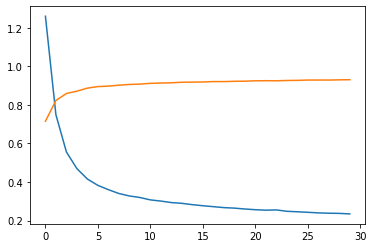

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
